In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
from pyentrp import entropy as pyent
import EntropyHub as EH
import neurokit2 as nk
import random
import sampen
import requests
import io
import apache_log_parser
from pprint import pprint
import os
from sklearn import preprocessing


In [3]:
df_S = pd.read_csv(f"{os.getcwd()}/wc_day73.csv")

In [4]:
df_S

,Unnamed: 0,date,count
0,0,1998-07-06 22:00:01,68
1,1,1998-07-06 22:00:02,125
2,2,1998-07-06 22:00:03,108
3,3,1998-07-06 22:00:04,139
4,4,1998-07-06 22:00:05,171
...,...,...,...
105551,105551,1998-07-08 03:19:12,223
105552,105552,1998-07-08 03:19:13,203
105553,105553,1998-07-08 03:19:14,211
105554,105554,1998-07-08 03:19:15,199


In [9]:
df_S_date = (pd.to_datetime(df_S["date"]).astype(int) / 10**9).array.reshape(-1, 1)
df_S_count = df_S["count"].array.reshape(-1, 1)

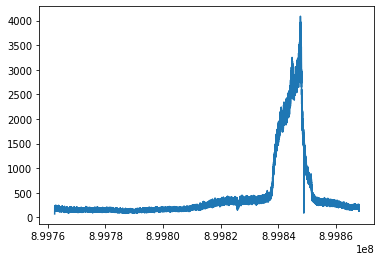

In [13]:
plt.plot(df_S_date, df_S_count)

In [15]:
def compute_enet(alpha, l1_ratio, x_train, y_train):
    return ElasticNet(alpha=alpha, l1_ratio=l1_ratio).fit(x_train, y_train)


def enet_loop(alpha, l1_ratio, x, y):
    counter = 59
    y_pred = pd.DataFrame([])
    for _index in range(int(x.size)):
        try:
            x_train = x[counter-59:counter]
            y_train = y[counter-59:counter]
            x_test = x[counter+1].reshape(-1, 1)
            enet = compute_enet(alpha, l1_ratio, x_train, y_train)
            target_y_pred = enet.predict(x_test)
            y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
        except Exception as e:
            print(e)
        counter += 1
    return y_pred

In [16]:
df_S_y_pred,  = enet_loop(1.0, 0.5, df_S_date, df_S_count)

/var/folders/qt/nt_r7qy14vj848kplz4kvgxmz_q9b0/T/ipykernel_66740/1700494049.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
/var/folders/qt/nt_r7qy14vj848kplz4kvgxmz_q9b0/T/ipykernel_66740/1700494049.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
/var/folders/qt/nt_r7qy14vj848kplz4kvgxmz_q9b0/T/ipykernel_66740/1700494049.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_pred = y_pred.append(pd.DataFrame(target_y_pred), ignore_index=True)
/var/folders/qt/nt_r7qy14vj848kplz4kvgxmz_q9b0/T/ipykernel_66740/1700494049.py:15: FutureWarning: The frame.append method is deprecat

KeyboardInterrupt: 